In [56]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

data = pd.read_csv("german_credit.csv")

In [3]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
data.shape


(1000, 21)

In [5]:
data.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [0]:
#There is no missing data 

In [6]:
data.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [7]:
data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [10]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
data.select_dtypes(include="object").dtypes

account_check_status       object
credit_history             object
purpose                    object
savings                    object
present_emp_since          object
personal_status_sex        object
other_debtors              object
property                   object
other_installment_plans    object
housing                    object
job                        object
telephone                  object
foreign_worker             object
dtype: object

In [9]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [10]:
data_dummy.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [14]:
data_dummy.corr().unstack().abs().sort_values(ascending=False).drop_duplicates().head(10)
#data_dummy.corr()

foreign_worker_yes                                                          foreign_worker_yes                                         1.000000
other_installment_plans_none                                                other_installment_plans_bank                               0.840546
property_unknown / no property                                              housing_for free                                           0.779853
personal_status_sex_female : divorced/separated/married                     personal_status_sex_male : single                          0.738036
housing_own                                                                 housing_rent                                               0.735968
other_debtors_none                                                          other_debtors_guarantor                                    0.731408
credit_history_critical account/ other credits existing (not at this bank)  credit_history_existing credits paid back duly till now    0

### Drop the original variables which are converted to dummy

In [11]:
data_dummy.info()
#The original variables are already dropped when get_dummies function is used. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [19]:
X = data_dummy.drop("default", axis=1)

In [20]:
y = data_dummy["default"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [134]:
rfcl = RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=2, random_state=9999)

In [135]:
rfcl = rfcl.fit(X_train,y_train)

In [136]:
rfcl.score(X_train,y_train)

1.0

In [137]:
rfcl.score(X_test, y_test)

0.812

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [138]:
#Accuracy Score
y_train_pred = rfcl.predict(X_train)
y_test_pred = rfcl.predict(X_test)

In [139]:
train_accuracy = accuracy_score(y_train_pred,y_train)
test_accuracy = accuracy_score(y_test_pred,y_test)
print("Train Accuracy : ", train_accuracy)
print("Test Accuracy : ", test_accuracy)

Train Accuracy :  1.0
Test Accuracy :  0.812


In [140]:
#Confusion Matrix
confusion_matrix(y_test, y_test_pred)

array([[175,  10],
       [ 37,  28]], dtype=int64)

In [ ]:
#Observation :
#Analyzing the confusion matrix

#True Positives (TP): we correctly predicted -number of customers who would Default - 28

#True Negatives (TN): we correctly predicted - number of customers who would not default - 175

#False Positives (FP): we incorrectly predicted - number of customers who would default(a "Type I error") - 10
#Falsely predict positive Type I error


#False Negatives (FN): we incorrectly predicted - number of customers who would not default(a "Type II error")- 37
#Falsely predict negative Type II error

### Q6 Show the list of the features importance( 1 Marks)

In [141]:
rfcl.fit(X,y)
importances = rfcl.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfcl.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.095663)
2. feature 4 (0.082132)
3. feature 0 (0.078556)
4. feature 10 (0.051712)
5. feature 2 (0.034931)
6. feature 3 (0.033827)
7. feature 8 (0.030636)
8. feature 12 (0.020614)
9. feature 27 (0.020124)
10. feature 5 (0.019254)
11. feature 7 (0.017324)
12. feature 18 (0.016954)
13. feature 33 (0.016216)
14. feature 39 (0.016022)
15. feature 54 (0.015886)
16. feature 48 (0.015855)
17. feature 45 (0.015852)
18. feature 44 (0.014972)
19. feature 36 (0.014864)
20. feature 20 (0.014802)
21. feature 43 (0.014143)
22. feature 14 (0.014090)
23. feature 32 (0.014040)
24. feature 47 (0.013943)
25. feature 58 (0.013753)
26. feature 31 (0.013714)
27. feature 30 (0.013536)
28. feature 51 (0.013501)
29. feature 23 (0.013490)
30. feature 57 (0.013377)
31. feature 34 (0.013136)
32. feature 6 (0.012092)
33. feature 53 (0.012061)
34. feature 56 (0.011729)
35. feature 52 (0.011276)
36. feature 19 (0.010813)
37. feature 46 (0.010661)
38. feature 15 (0.009913)
39. feature 4

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [150]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [143]:
# Use below values
num_folds = 10
seed = 77

In [144]:
#Validate the Random Forest model build above using k fold

In [145]:
k_fold = KFold(n_splits= num_folds, shuffle= True, random_state= seed)

In [146]:
scores = cross_val_score(rfcl, X, y, cv=k_fold)
print(scores)

[0.88 0.82 0.69 0.79 0.74 0.74 0.77 0.73 0.73 0.8 ]


In [0]:
#Calculate Mean score

In [147]:
np.mean(scores)

0.769

In [148]:
# Calculate score standard deviation using std()

In [149]:
np.std(scores)

0.05223983154643592

# Q8 Print the confusion matrix( 1 Marks)

In [153]:
#Confusion matrix is already printed above. Could you please elaborate if the some other answer is expected here.

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [154]:
#Classification Accuracy 
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       185
           1       0.74      0.43      0.54        65

   micro avg       0.81      0.81      0.81       250
   macro avg       0.78      0.69      0.71       250
weighted avg       0.80      0.81      0.79       250



In [0]:
#0 - Not Default 
#1 - Default


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

No handles with labels found to put in legend.


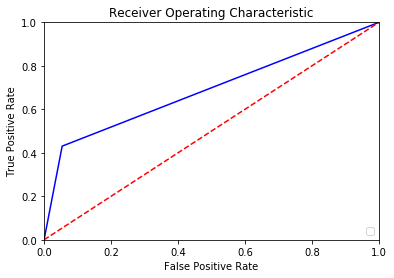

In [155]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [156]:
auc = roc_auc_score(y_test, y_test_pred)
print("AUC : ", auc)

AUC :  0.6883575883575883


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
